## Evaluation Notebook #2

Run this notebook after running the `single_field.ipynb` notebook on all the fields that are sampled from a dataset. As a result, there would be two csv files created for each field. One csv file contains the F1-scores for all evaluation subfields across platforms at an intersection over union (IoU) threshold of 0.5. The second csv file contains the mean F1-score (averaged over the evaluation subfields) for various IoU thresholds across platforms. Ensure that these two groups of csv files are stored in two separate directories. The file paths to these two directories are the inputs to this notebook.

The goal of this notbook is an overall comparison across all the fields, which should be representative of the entire dataset. This notebook should inform the user of the relative nuclear segmentation performance of the platforms on the particular dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import skimage.io as io
import matplotlib.pyplot as plt
import os
sns.set_style('whitegrid')

The code below is the user's input. Input the filepaths to the csv files generated by the `single_field.ipynb` notebook as well as the filepath to store the figures containing the evaluations.

In [2]:
# filepath to the directory containing the csv files with the F1-scores at IoU=0.5 for the subfields. There should be one csv file for each WSI field.
half_IoU_dir_path = r'C:\Users\mrl\Desktop\nuclear_seg_github\imgs\F1_5IoU_csv'

# filepath to the directory containing the csv files with the mean F1-scores (averaged over subfields) at varying IoU thresholds.
# There should be one csv file for each WSI field.
all_IoU_dir_path = r'C:\Users\mrl\Desktop\nuclear_seg_github\imgs\F1_allIoU_csv'

# Providing the filepath to save generated figures
combined_5IoU_path = r'C:\Users\mrl\Desktop\nuclear_seg_github\imgs\combined_figs\combined_halfIoU.png'
combined_allIoU_path = r'C:\Users\mrl\Desktop\nuclear_seg_github\imgs\combined_figs\combined_allIoUs.png'

There are no more user inputs required. The cells below should be able to run without any required editions.

The below figure shows the relative performance of nuclear segmentation platforms at an IoU threshold of 0.5. This means that a predicted nucleus has to have at least 0.5 IoU to be counted as a true positive. Having an IoU threshold of 0.5 or above ensures that there is a maximum of one true positive predicted nucleus for every ground truth nucleus.

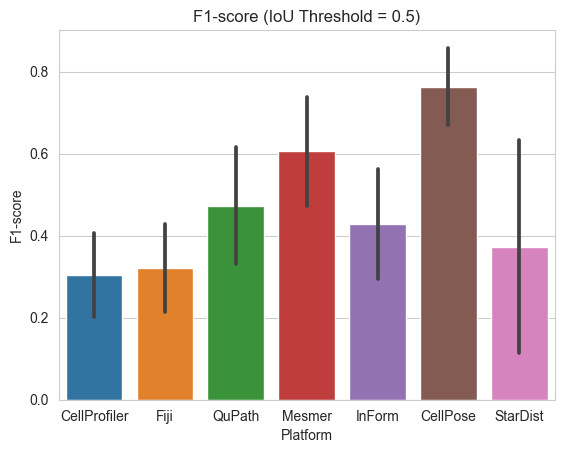

In [3]:
# Appending the dataframes of each field into a list
halfIoU_df_list = []
for csv_file in os.listdir(half_IoU_dir_path):
    halfIoU_df_list.append(pd.read_csv(os.path.join(half_IoU_dir_path, csv_file)))
# Concatenating the dataframes into one big dataframe
combined_5IoU_df = pd.concat(halfIoU_df_list)
F1_barplot_combined = sns.barplot(combined_5IoU_df, errorbar='sd')
F1_barplot_combined.set(xlabel ="Platform", ylabel = "F1-score", title ='F1-score (IoU Threshold = 0.5)')
plt.savefig(combined_5IoU_path, dpi=500)

The below figure shows the relative performance of nuclear segmentation platforms at varying IoU thresholds. Higher IoU thresholds result in stricter conditions for a predicted nucleus being classified as a true positive. Hence, F1-scores tend to decrease with increasing IoU thresholds.

C:\Users\mrl\AppData\Local\Temp\ipykernel_39240\1066574623.py:8: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  combined_F1_lineplot = sns.lineplot(data=combined_allIoU_df, dashes=False, markers='s', legend=True)


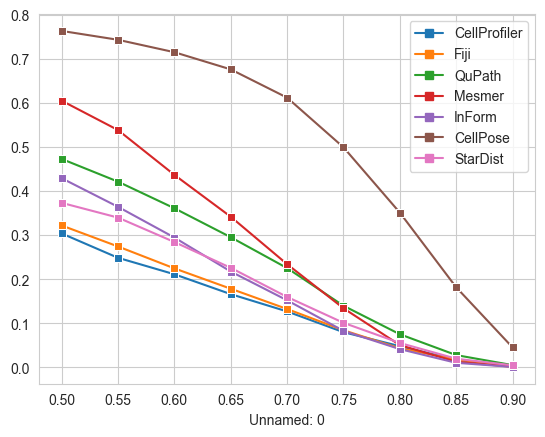

In [4]:
# Appending the dataframes of each field into a list
allIoU_df_list = []
for csv_file in os.listdir(all_IoU_dir_path):
    allIoU_df_list.append(pd.read_csv(os.path.join(all_IoU_dir_path, csv_file)))
# Concatenating the dataframes into one big dataframe
combined_allIoU_df = sum(allIoU_df_list)/len(allIoU_df_list)
combined_allIoU_df = combined_allIoU_df.set_index('Unnamed: 0')
combined_F1_lineplot = sns.lineplot(data=combined_allIoU_df, dashes=False, markers='s', legend=True)
plt.savefig(combined_allIoU_path, dpi=500)